# Locally weighted regression
1. read and normalize the dataset
2. generate W for every query point
3. No training is involved, directly make predictions using close form solution we derived
4. find the best value of tau(bandwidth parameter)[cross validation]

In [82]:
#Loading data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [83]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

In [84]:
X = dfx.values
Y = dfy.values

In [85]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [86]:
plt.style.use("seaborn")

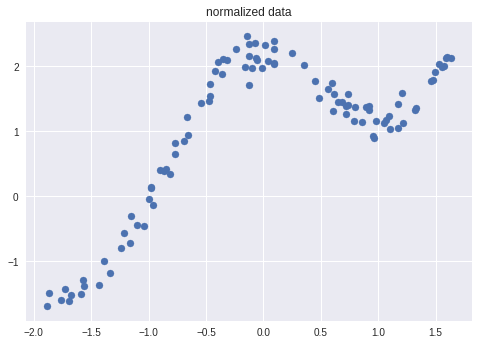

In [87]:
u = X.mean()
std = X.std()

X = (X-u)/std
plt.title("normalized data")
plt.scatter(X,Y)
plt.show()


## Find out W (mxm) diagonal matrix

In [88]:
# print(type(np.mat(np.eye(5))))

# a*b --> a,b --> matrices --> matrix multiplication
# a*b --> a,b --> arrays --> element wise

In [89]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi - x),(xi - x).T)/(-2*tau*tau))
    return W

In [90]:
X = np.mat(X)
Y = np.mat(X)
M = X.shape[0]

W = getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


## Make Predictions

In [91]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = (X'WX)inv * X'WY'
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [92]:
theta,pred = predict(X,Y,1.0,1.0)

In [93]:
print(theta) #wrong output

[[ 1.0000000e+00]
 [-8.8817842e-16]]


In [94]:
print(pred)

[[1.]]


## Visualize, predict, analysis the effect of tau

In [99]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    X0 = np.array(X)
    Y0 = np.array(Y)
    
    plt.title("Tau/Bandwidth param %.2f"%tau)
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

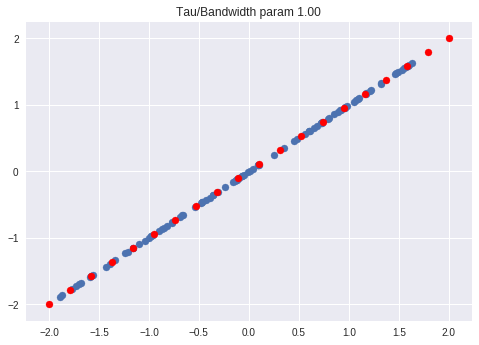

In [100]:
plotPrediction(1) #wrong

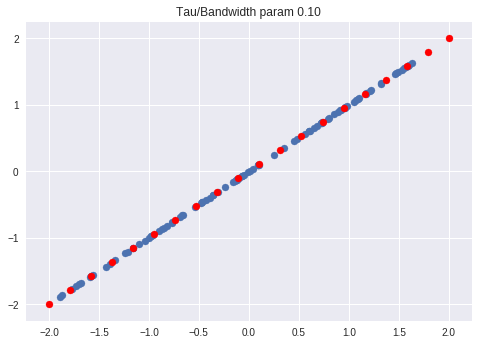

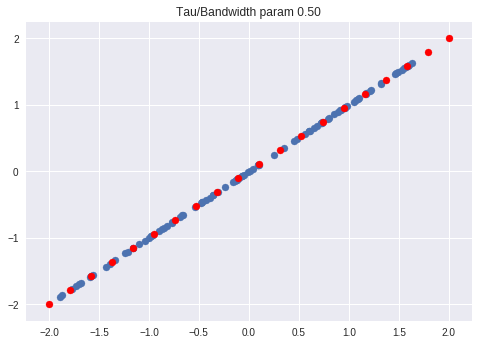

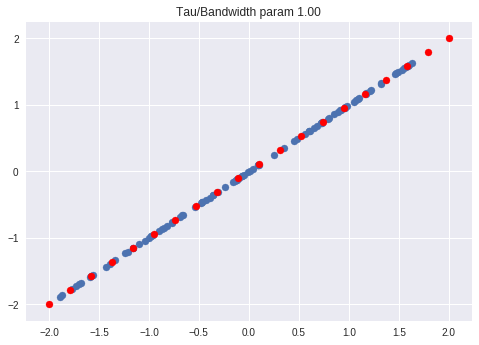

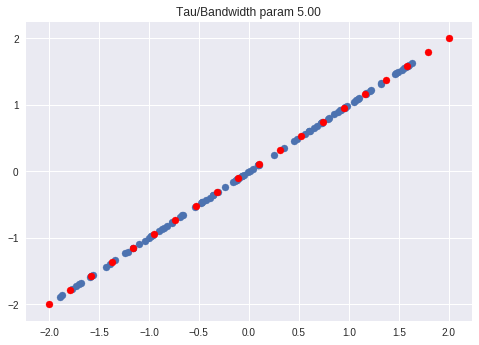

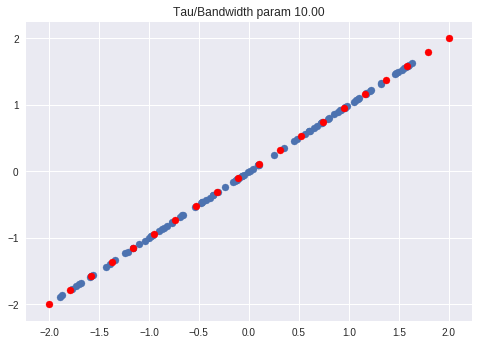

In [101]:
taus = [0.1,0.5,1,5,10]

for t in taus:
    plotPrediction(t)